# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import pandas as pd #import dataset and make dataframe
import matplotlib.pyplot as plt
import numpy as np # to make arrays

### Importing the training set

In [2]:
# Here we import training set as we will train only on train set 
# Here since we have train & test set so no need to split the dataset
dataset_train = pd.read_csv(r'C:\Users\KUNAL\Documents\Deep_Learning\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Train.csv')
dataset_train


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
#we need to 2 things-1.)select then open Gsp column. 2.)Convert into numpy array by values as only numpy array are taken as inputs for NN
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))# feature values lies btw 0 & 1
training_set_scaled = sc.fit_transform(training_set)# calling fit_transform method of minmaxscaler class

### Creating a data structure with 60 timesteps and 1 output

In [51]:
# Can try different time steps- 60 Time steps-means 3 months. 
So for the day 1st jan 2017 we will look at the tree previous months 1st jan of 
# Create a datastructure specifying what rnn need to remember for predicting the next stock price -called no. of Timesteps
#60 timesteps- Rnn is going to look at 60 stock prices(days) before time T of past stock prices & rnn will learn,
#understand correlations,trends & based on it will predict the next output i.e the stock price at time T+1


SyntaxError: invalid syntax (<ipython-input-51-808102d54224>, line 2)

In [5]:
X_train = []# inputs will contain 60 previous stock prices before the financial day
y_train = []# output will contain the stock price next financial day
for i in range(60,1258):#Lower bound as 60 as from 60th financial day of 2012 i-60 and then to i  i.e before Time T & Upper bound is 1258 i.e total no. of rows in our dataset
    X_train.append(training_set_scaled[i-60:i, 0])# 0 to 59 i.e 60 as upperbound is not counted(range in []),0 specifies the column we have to take from X_train_scaled
    y_train.append(training_set_scaled[i, 0])# here we take 60 as we want to predict stock price at T+1 i.e 59+1=60
X_train,y_train=np.array(X_train),np.array(y_train)    

In [6]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [7]:
X_train.shape

(1198, 60)

In [8]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [9]:
y_train.shape

(1198,)

### Reshaping

In [10]:
# Adding more no. of Predictors/indicators i.e columns to predict trends in Gsp
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))# 2 arguments the data,specify the new shape to have
#The 2nd argument - no. of batch size,timesteps-1 represents the no. of Timesteps,indicators
# So now are X_train is in 3d view Rows-1258,columns=60 timesteps,indicators=1

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [11]:
#Sequential class -builds a NN
#Dense class-to add input & output layer
# Lstm- to add lstm layers
# Dropout-to dropout Regularisation
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [12]:
regressor=Sequential()# Regressor is an object of sequential class that represents sequence of layers
#Why Regressor as we are predicting the continous values

### Adding the first LSTM layer and some Dropout regularisation

In [13]:
# Add 2 layers-1.)Lstm,2.)Dropout layers
# LSTM-WE need to add 3 arguments-1.)no. of units/neurons-no. of lstm units/cells to have in the stacked lstm layer-in this we choose
#50 as we need to have high dimensionality/neurons.2.)return_Sequences-true as we are gonna add more layers to make a stacked lstm nn
#3.)input_shape only take last 2 arguments i.e timesteps & indicators and take no. of rows as default
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))# we call add object of Lstm class
#adding some dropout regularisation to avoid overfitting- 20% as classic dropout of neurons-tells the no. of neurons we need to drop
# we will be droping 0.2 neurons during FP & Bp in each iteration and 20% of 50 neurons is 10 will be dropped in each iteration of training
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [14]:
# No need to write the input_shape-as due to units i.e no. of neurons we get to know the input_shape
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [16]:
#return_Sequence as false as we need not add more lstm layers
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [17]:
# For making a fully connected layer we use Dense class-units as 1 as we are predicted only one output i.e no. of neurons i.e stock price at time T+1
regressor.add(Dense(units=1))

### Compiling the RNN

In [18]:
# Optimiser performs SGD by adam/RMSprop to update the weights in each iteration's and reduce the loss i.e cost function
regressor.compile(optimizer='adam',loss='mean_squared_error')
# not take metrics as at last will print the error & the r2 score

### Fitting the RNN to the Training set

In [19]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)#epochs-how many times we need to train(FP & BP) our dataset on 

Epoch 1/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0411
Epoch 2/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0052
Epoch 11/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0049
Epoch 12/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0042
Epoch 13/100


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [77]:
dataset_test = pd.read_csv(r'C:\Users\KUNAL\Documents\Deep_Learning\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [74]:
# predict the gsp of jan 2017 -so we have trained our to predict the stock price at T+1 by previous 60 financial days 
#in order to predict we need both training & test set
#1.)Concatenation of train & test set-we use concat not concatenation as we need both real data of train & test 
# Get the dataset from 2012 to 2016 and jan 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)# concatenate the columns i.e vertical axis=0,horizontal axis=1
# get the inputs by dataset_total we do 1 st financial day i.e 3rd jan - to last financial day
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)# to get right numpy shape 
inputs=sc.transform(inputs)#transforming i.e scaling the valuesn on original dataset by minmaxscaler
# now to build the 3-d structure of test set first append the values in X_test & y_test
X_test = []
for i in range(60,80):# we take previous 60 days stock price and at T+1 other 20 financial days
    X_test.append(inputs[i-60:i, 0])
X_test=np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price=regressor.predict(X_test)#y_pred
predicted_stock_price=sc.inverse_transform(predicted_stock_price)# now so as to get predicted stock price not in 0 & 1 range
    

In [79]:
predicted_stock_price

array([[805.74786],
       [803.01953],
       [802.3043 ],
       [803.06226],
       [805.992  ],
       [811.6509 ],
       [817.8015 ],
       [821.6429 ],
       [823.1378 ],
       [823.1105 ],
       [822.4235 ],
       [821.5591 ],
       [820.8708 ],
       [820.96094],
       [821.74695],
       [825.67084],
       [832.3574 ],
       [840.42773],
       [846.3149 ],
       [845.0122 ]], dtype=float32)

In [78]:
print(pd.concat((predicted_stock_price,real_stock_price['Open']),axis=0))

AttributeError: module 'numpy' has no attribute 'concat'

### Visualising the results

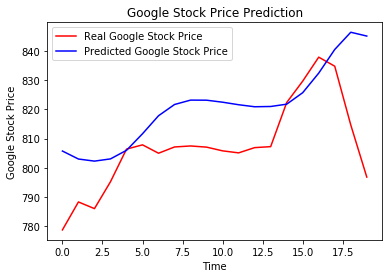

In [80]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [36]:
import math
from sklearn.metrics import mean_squared_error,r2_score
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

17.262630251738003

In [37]:
score=r2_score(real_stock_price, predicted_stock_price)
score
relation btw predicted and actual values


-0.37111842097724246